### To be Done
1. use a better example (two image completely aligned in size and pixel position)
2. make a better python plot
3. create discount mask

### Picture Reference
1. https://www.webinpaint.com/
2. http://jiahuiyu.com/deepfill/

In [2]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
file_before = 'before.png'
file_after = 'after.png'

In [71]:
def img_2_arr(filename, w = None, h = None, img_type = 'png'):
    im = Image.open(filename)
    if w is not None:
        im = im.resize((w, h))
    np_arr = np.array(im)
    if img_type == 'png':
        np_arr = np_arr[:, :, :-1]
    return np_arr

In [72]:
# get np array for each png image 
arr_before = img_2_arr(file_before, w = 400, h = 400, img_type = 'png')
arr_after = img_2_arr(file_after, w = 400, h = 400, img_type = 'png')
print('arr_before.shape = ', arr_before.shape)
print('arr_after.shape = ', arr_after.shape)

arr_before.shape =  (400, 400, 3)
arr_after.shape =  (400, 400, 3)


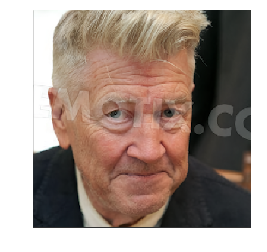

In [82]:
plt.imshow(arr_before)
plt.axis('off');

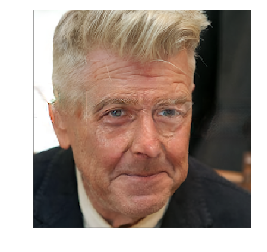

In [83]:
plt.imshow(arr_after)
plt.axis('off');

diff.shape =  (400, 400, 3)


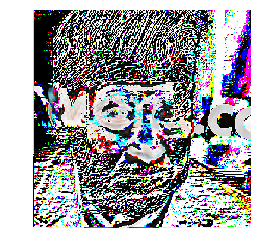

In [84]:
diff = np.abs(arr_after - arr_before)
print('diff.shape = ', diff.shape)
plt.imshow(diff)
plt.axis('off');

In [76]:
def create_discount_mask(gamma = 0.99, size = 400):
    d_mask = np.zeros((size, size, 3), dtype = np.float32)
    for i in range(size):
        for j in range(size):
            d1 = min(i, size - i)
            d2 = min(j, size - j)
            factor = max(gamma**d1, gamma**d2)
            d_mask[i, j, :] = factor
    return d_mask

In [77]:
d_mask = create_discount_mask()
print('d_mask.shape = ', d_mask.shape)

d_mask.shape =  (400, 400, 3)


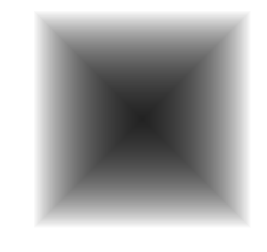

In [85]:
plt.imshow(d_mask);
plt.axis('off');

diff_discount =  (400, 400, 3)


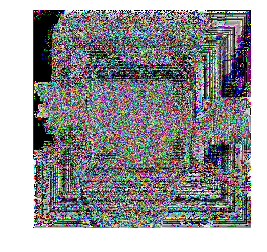

In [86]:
diff_discount = diff * d_mask
print('diff_discount = ', diff_discount.shape)
plt.imshow(diff_discount);
plt.axis('off');

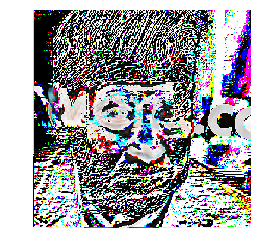

In [87]:
plt.imshow(diff);
plt.axis('off');